In [ ]:
# Clone Ultralytics (YOLOv8/YOLOv9+ base)
!git clone https://github.com/ultralytics/ultralytics
%cd ultralytics




Cloning into 'ultralytics'...
remote: Enumerating objects: 55203, done.
remote: Counting objects: 100% (705/705), done.
remote: Compressing objects: 100% (432/432), done.
remote: Total 55203 (delta 504), reused 288 (delta 273), pack-reused 54498 (from 3)
Receiving objects: 100% (55203/55203), 31.26 MiB | 16.56 MiB/s, done.
Resolving deltas: 100% (40764/40764), done.
/content/ultralytics


In [ ]:
# Install Roboflow
!pip install roboflow

# Import Roboflow
from roboflow import Roboflow

# Initialize Roboflow with API key
rf = Roboflow(api_key="TCupuyQzrVWD2CZlYcX5")

# Load project and version (updated to version 3)
project = rf.workspace("new-oa5rj").project("weed25-labeling-zf7f5")
version = project.version(3)

# Download dataset in YOLOv9 format
dataset = version.download("yolov9")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to weed25-labeling-3 in yolov9:: 100%|██████████| 19114/19114 [00:05<00:00, 3693.97it/s]


In [ ]:
model_yaml = """
# YOLOv9 backbone + YOLOv11 head hybrid model (Ultralytics-compatible)
nc: 25
depth_multiple: 1.0
width_multiple: 1.0

backbone:
  [
   [-1, 1, Conv, [64, 3, 2]],
   [-1, 1, Conv, [128, 3, 2]],
   [-1, 1, RepNCSPELAN4, [256, 128, 64, 1]],
   [-1, 1, ADown, [256]],
   [-1, 1, RepNCSPELAN4, [512, 256, 128, 1]],
   [-1, 1, ADown, [512]],
   [-1, 1, RepNCSPELAN4, [512, 512, 256, 1]],
   [-1, 1, ADown, [512]],
   [-1, 1, RepNCSPELAN4, [512, 512, 256, 1]],
  ]

head:
  [
   [-1, 1, nn.Upsample, [None, 2, "nearest"]],
   [[-1, 5], 1, Concat, [1]],
   [-1, 1, C2f, [512, 1]],

   [-1, 1, nn.Upsample, [None, 2, "nearest"]],
   [[-1, 3], 1, Concat, [1]],
   [-1, 1, C2f, [256, 1]],

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 11], 1, Concat, [1]],
   [-1, 1, C2f, [512, 1]],

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 8], 1, Concat, [1]],
   [-1, 1, C2f, [1024, 1]],

   [[11, 14, 20], 1, Detect, [nc]],
  ]
"""

with open("yolo_v9v11.yaml", "w") as f:
    f.write(model_yaml)


In [ ]:
# Option 1: Train from scratch
from ultralytics import YOLO
model = YOLO("/content/ultralytics/yolo_v9v11.yaml")
model.train(data="/content/ultralytics/weed25-labeling-3/data.yaml", epochs=30, imgsz=640)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/ultralytics/yolo_v9v11.yaml, data=/content/ultralytics/weed25-labeling-3/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False

100%|██████████| 755k/755k [00:00<00:00, 132MB/s]



                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512

100%|██████████| 5.35M/5.35M [00:00<00:00, 256MB/s]


AMP: checks passed ✅


train: Scanning /content/ultralytics/weed25-labeling-3/train/labels... 7656 images, 35 backgrounds, 0 corrupt: 100%|██████████| 7656/7656 [00:03<00:00, 2231.66it/s]


train: New cache created: /content/ultralytics/weed25-labeling-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/ultralytics/weed25-labeling-3/valid/labels... 1897 images, 7 backgrounds, 0 corrupt: 100%|██████████| 1897/1897 [00:01<00:00, 1175.49it/s]

val: New cache created: /content/ultralytics/weed25-labeling-3/valid/labels.cache


Plotting labels to /content/ultralytics/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 102 weight(decay=0.0), 109 weight(decay=0.0005), 108 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/ultralytics/runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      10.3G      2.389      4.214      3.335         27        640: 100%|██████████| 479/479 [06:47<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:42<00:00,  1.42it/s]


                   all       1897       2259      0.206       0.17     0.0798     0.0318

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      11.9G      1.292       3.07      1.995         27        640: 100%|██████████| 479/479 [06:45<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]


                   all       1897       2259      0.233      0.355      0.141     0.0764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30        12G      1.137      2.661      1.785         22        640: 100%|██████████| 479/479 [06:42<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:39<00:00,  1.51it/s]


                   all       1897       2259      0.315      0.441      0.279      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30        12G      1.062      2.423      1.705         28        640: 100%|██████████| 479/479 [06:41<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.398      0.486      0.368      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30        12G      1.009      2.264      1.652         26        640: 100%|██████████| 479/479 [06:41<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.401      0.506      0.432      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      12.1G     0.9593      2.092      1.611         27        640: 100%|██████████| 479/479 [06:41<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.469      0.561      0.512      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      12.1G     0.9384      1.961      1.588         26        640: 100%|██████████| 479/479 [06:40<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.50it/s]

                   all       1897       2259      0.572      0.567      0.585      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      12.2G     0.9269      1.864      1.575         27        640: 100%|██████████| 479/479 [06:41<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.586      0.591      0.609      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      12.8G     0.9055      1.763      1.559         18        640: 100%|██████████| 479/479 [06:41<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259       0.66      0.633      0.682      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      12.9G     0.8777      1.654       1.53         27        640: 100%|██████████| 479/479 [06:40<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.659       0.66      0.702      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30        13G     0.8721      1.587      1.526         27        640: 100%|██████████| 479/479 [06:40<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.50it/s]

                   all       1897       2259      0.698      0.677      0.738       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      10.7G     0.8631       1.52      1.514         28        640: 100%|██████████| 479/479 [06:41<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.50it/s]

                   all       1897       2259       0.78      0.681      0.777      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      10.7G      0.844      1.445      1.499         20        640: 100%|██████████| 479/479 [06:40<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259        0.8      0.709      0.794      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      10.7G     0.8426      1.398      1.494         24        640: 100%|██████████| 479/479 [06:40<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:39<00:00,  1.50it/s]

                   all       1897       2259      0.776      0.732        0.8      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      10.7G     0.8216       1.36      1.476         27        640: 100%|██████████| 479/479 [06:41<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.829      0.761      0.824      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      11.3G     0.8201      1.312       1.47         29        640: 100%|██████████| 479/479 [06:42<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:39<00:00,  1.50it/s]

                   all       1897       2259      0.849      0.741      0.827      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      11.7G     0.8087      1.262      1.464         23        640: 100%|██████████| 479/479 [06:41<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.855      0.756      0.834      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      11.8G     0.8004      1.231      1.459         23        640: 100%|██████████| 479/479 [06:41<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.50it/s]

                   all       1897       2259      0.843      0.784       0.85      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      11.9G     0.7888      1.192      1.448         27        640: 100%|██████████| 479/479 [06:41<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:39<00:00,  1.51it/s]

                   all       1897       2259      0.864      0.783      0.858      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      12.3G     0.7799      1.159       1.44         20        640: 100%|██████████| 479/479 [06:41<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.864      0.793       0.86      0.627


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      12.4G     0.8384     0.9779       1.63         12        640: 100%|██████████| 479/479 [06:40<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.879      0.809      0.878      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      12.4G     0.8032     0.8924      1.602         10        640: 100%|██████████| 479/479 [06:39<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:39<00:00,  1.50it/s]

                   all       1897       2259      0.857      0.799      0.869       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      12.5G     0.7838     0.8468       1.58          9        640: 100%|██████████| 479/479 [06:39<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.50it/s]

                   all       1897       2259      0.895      0.803       0.88      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      12.9G     0.7616      0.806      1.555          8        640: 100%|██████████| 479/479 [06:39<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.894      0.819      0.884      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      10.3G     0.7535     0.7684      1.547         10        640: 100%|██████████| 479/479 [06:39<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.888      0.838      0.894      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30        11G     0.7392     0.7398      1.535          9        640: 100%|██████████| 479/479 [06:39<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.50it/s]

                   all       1897       2259      0.882      0.839      0.897      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30        11G     0.7245     0.7096      1.523         10        640: 100%|██████████| 479/479 [06:39<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.904      0.842      0.903      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30        11G     0.7143     0.6862      1.507          9        640: 100%|██████████| 479/479 [06:39<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.898      0.841      0.903      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      11.6G     0.7021     0.6649      1.501         10        640: 100%|██████████| 479/479 [06:40<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:40<00:00,  1.49it/s]

                   all       1897       2259      0.906      0.848      0.907      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      11.6G     0.6841     0.6498       1.48         11        640: 100%|██████████| 479/479 [06:39<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:39<00:00,  1.50it/s]

                   all       1897       2259      0.918      0.839      0.907      0.687



30 epochs completed in 3.735 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/last.pt, 82.8MB
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/best.pt, 82.8MB

Validating /content/ultralytics/runs/detect/train/weights/best.pt...
Ultralytics 8.3.102 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO_v9v11 summary (fused): 109 layers, 41,100,059 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 60/60 [00:41<00:00,  1.43it/s]


                   all       1897       2259      0.918      0.839      0.907      0.687
         Alligatorweed         85        101      0.942      0.808      0.854      0.642
     Asiatic_Smartweed         81        170       0.73      0.276      0.511      0.238
         Bidens pilosa         86         87      0.988      0.962      0.976      0.854
      Black_nightshade         78         97      0.952      0.814      0.898      0.636
        Ceylon spinach         84         84      0.985          1      0.995      0.968
      Chinese_knotweed         73         95      0.894      0.708      0.839      0.458
      Common Dayflower         76         85      0.919      0.929      0.981        0.8
          Indian aster         79        102      0.941      0.804      0.884      0.523
       Mock_strawberry         72        126      0.717      0.667       0.76       0.49
        Shepherd_Purse         43         51      0.884      0.896      0.956      0.695
                 Viol

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a02a8035a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,  


image 1/1 /content/ultralytics/weed25-labeling-3/valid/images/Alligatorweed-151-_JPG.rf.467ced5ed8c9fd84ccaa8c176f56ce1b.jpg: 640x640 1 Alligatorweed, 59.1ms
Speed: 3.0ms preprocess, 59.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


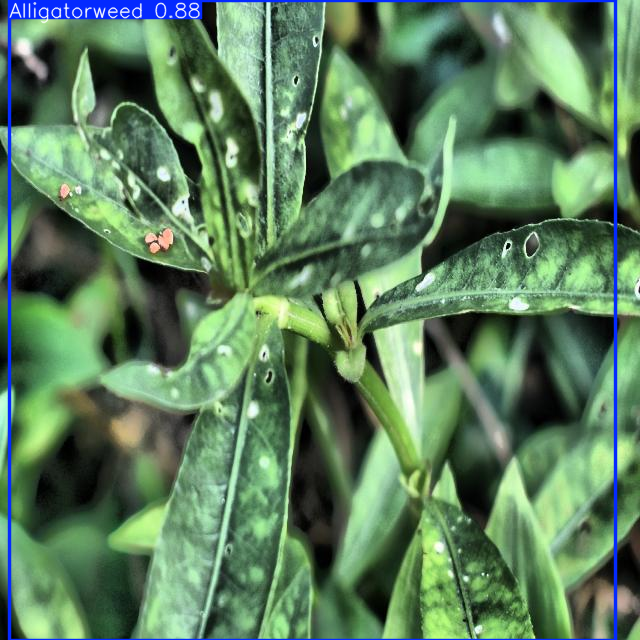

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/ultralytics/runs/detect/train/weights/best.pt")
results = model.predict(source="/content/ultralytics/weed25-labeling-3/valid/images/Alligatorweed-151-_JPG.rf.467ced5ed8c9fd84ccaa8c176f56ce1b.jpg", conf=0.25)
results[0].show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
!zip -r /content/results.zip /content/ultralytics

Streaming output truncated to the last 5000 lines.
  adding: content/ultralytics/weed25-labeling-3/train/labels/purslane-50-_JPG.rf.1075ec91e2449bf66e43280e25db1568.txt (deflated 14%)
  adding: content/ultralytics/weed25-labeling-3/train/labels/Shepherd-Purse-111-_JPG.rf.b97c3ff74fac5c3e9d30824a860d50b5.txt (deflated 19%)
  adding: content/ultralytics/weed25-labeling-3/train/labels/sedge-13-_JPG.rf.3b5916adcd8b7c08a627ba9f9afa2aab.txt (deflated 14%)
  adding: content/ultralytics/weed25-labeling-3/train/labels/barnyard-grass-405-_JPG.rf.d7924bace66f91028f2c596ae49d22cb.txt (deflated 7%)
  adding: content/ultralytics/weed25-labeling-3/train/labels/IMG_20220714_103546_1_jpg.rf.83a74017ee27540207f1ea1abd24753e.txt (deflated 34%)
  adding: content/ultralytics/weed25-labeling-3/train/labels/abutilon-theophrasti-54-_JPG.rf.60c22aa39e196de596496f6f12b37a20.txt (deflated 14%)
  adding: content/ultralytics/weed25-labeling-3/train/labels/cocklebur-28-_JPG.rf.ada4a4c8ecc633e53443c4f14a9dd1fb.txt (

In [ ]:
!cp /content/results.zip /content/drive/MyDrive/